In [14]:
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Function to plot an array in logaritmic scale
def plot_residuals(r):
    plt.semilogy(range(len(r)), r)
    plt.xlabel('Iteration')
    plt.ylabel('Norm of the residual')
    plt.show()
    
# Function to calculate the spectral radius of a matrix
def spectral_radius(B):
    eigvals = np.linalg.eigvals(B)
    S_B = np.max(np.abs(eigvals))
    
    return S_B

<h1 style="background-color:rgb(181 ,50 ,84);color:white;text-align:center">Iterative methods</h1>

It is always possible to write $A = P-N$ with $P$ non singular. The problem $Ax=b$ is then solved by choosing an appropriate initial guess $x_0$ and substituting in one of the following:

1. $Px_{k+1}=Nx_k+b$
2. $x_{k+1} = P^{-1}Nx_k+b$
3. $x_{k+1} = x_k + P^{-1}r_k$

<span style="color:red">Theorem</span> The iterative method converges to the exact solution for every initial guess if and only if the iteration matrix $B = P^{-1}N$ has spectral radius $\mathcal{S}<1$.

<span style="color:orange">N.B.</span> $\varepsilon_{k+1} =B^k\varepsilon_0$

<h1 style="background-color:rgb(181 ,50 ,84);color:white;text-align:center">Jacobi's method</h1>

We can write the matrix $A$ as $$A = -E+D-F$$

with $E$ strictly lower triangular, $D$ diagonal and $F$ strictly upper triangular so that

$$P = D,\ \ \ \ N = E+F$$

<span style="color:orange">N.B.</span> Iteration matrix $B_J = P^{-1}N = I -D^{-1}A$

### Algorithm

In [3]:
def Jacobi_method(A, b, x0, tol = 0.001):
    """
    Solves a linear system using Jacobi's method
    
    Arguments:
        A (numpy array): nxn matrix
        b (numpy array): nx1 known vector
        x0 (numpy arary): nx1 vector -> initial guess
        tol (int): tolerance
        
    Returns:
        x_k (numpy array): solution of the linear system
    """
    
    # Matrix D with the diagonal terms of A
    D = np.diag(np.diag(A))
    D_inv = np.linalg.inv(D)
    
    # Residual of the initial guess
    r_0 = b - np.dot(A, x0)
    
    # First iteration
    x_k = x0.copy()
    r_k = b - np.dot(A, x_k)
    
    # List used to plot the history of the residuals
    residuals = [np.linalg.norm(r_0)]
    
    # Algorithm
    while np.linalg.norm(r_k) / np.linalg.norm(r_0) > tol:
        x_k = x_k + D_inv @ r_k
        r_k = b - A @ x_k
        
        # Adds r_k to the list of the residuals
        residuals.append(np.linalg.norm(r_k))
    
    # Plot
    plot_residuals(residuals)
    
    return x_k


def Jacobi_iteration_matrix(A):
    """
    Calculates the iteration matrix for Jacobi's method
    
    Arguments:
        A (numpy array): nxn matrix
        
    Returns:
        B (numpy array): nxn iteration matrix
    """
    
    # Matrix dimensions
    n = A.shape[0]
    
    # Matrix D with the diagonal terms of A
    D = np.diag(np.diag(A))
    D_inv = np.linalg.inv(D)
    
    # Iteration matrix
    B = np.eye(n) - D_inv @ A

    return B

A = 
[[ 60  18   7   1]
 [ 17 380   2  11]
 [ 11   8 380   0]
 [ 15  14   9 400]]



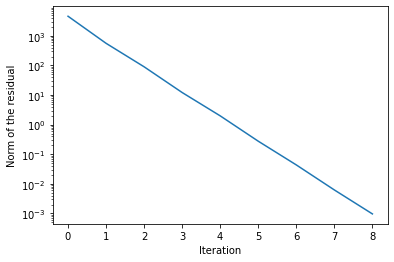

x = 
 [[ 0.29541892]
 [ 0.00807363]
 [ 0.02022681]
 [-0.01181435]] 



In [4]:
# Input matrix
n = 4
A = np.random.randint(0, 20, (n, n))

# Makes A non singular and diagonally dominant
for i in range(A.shape[0]):
    A[i][i] = (A[i][i] + 2) * 20
    
b = np.random.randint(0, 20, (n, 1))
x_0 = np.random.randint(0, 20, (n, 1))*1.

print(f'A = \n{A}\n')

# Solution
x = Jacobi_method(A, b, x_0, tol=0.000001)
print('x = \n', x, '\n')

<h1 style="background-color:rgb(181 ,50 ,84);color:white;text-align:center">Gauss-Seidel method</h1>

We write again the matrix $A$ as $$A = -E+D-F$$

with $E$ strictly lower triangular, $D$ diagonal and $F$ strictly upper triangular but we set

$$P = D - E,\ \ \ \ N = F$$

<span style="color:orange">N.B.</span> Iteration matrix $B_J = P^{-1}N = (D-E)^{-1}F$

### Algorithm

In [5]:
def Gauss_Seidel_method(A, b, x0, tol=0.001):
    """
    Solves a linear system using Gauss-Seidel's method
    
    Arguments:
        A (numpy array): nxn matrix
        b (numpy array): nx1 known vector
        x0 (numpy arary): nx1 vector -> initial guess
        tol (int): tolerance
        
    Returns:
        x_k (numpy array): solution of the linear system
    """
    
    # Matrix dimensions
    n = A.shape[0]
    
    # Residual of the initial guess
    r_0 = b - np.dot(A, x0)
    
    # First iteration
    x_k = x0.copy()
    r_k = b - np.dot(A, x_k)

    # List used to plot the history of the residuals
    residuals = [np.linalg.norm(r_0)]

    # Algorithm
    while np.linalg.norm(r_k) / np.linalg.norm(r_0) > tol:
        
        # Vector for the next iteration
        x_kp1 = np.zeros((n, 1))
        
        # Calculates the components for x_kp1
        for j in range(n):
            s1 = A[j, :j] @ x_kp1[:j]
            s2 = A[j, j + 1:] @ x_k[j + 1:]
            
            x_kp1[j] = (b[j] - s1 - s2) / A[j, j]  
        
        x_k = x_kp1
        
        # Residual
        r_k = b - np.dot(A, x_k)
        residuals.append(np.linalg.norm(r_k))
    
    # Plot
    plot_residuals(residuals)
    
    return x_k


def Gauss_Seidel_iteration_matrix(A):
    """
    Calculates the iteration matrix for Gauss-Seidel's method
    
    Arguments:
        A (numpy array): nxn matrix
        
    Returns:
        B (numpy array): nxn iteration matrix
    """
    
    # Matrix dimensions
    n = A.shape[0]

    # Decomposition of A
    D = np.diag(np.diag(A))
    E = -np.tril(A, k=-1)
    F = -np.triu(A, k=1)
    
    # Iteration matrix
    B = np.linalg.inv(D - E) @ F

    return B

A = 
[[300  10  13   2   4]
 [ 16 320   2  10   1]
 [ 10  19 260   3  14]
 [ 14  15  12  40  19]
 [ 12   0  12   6 340]]



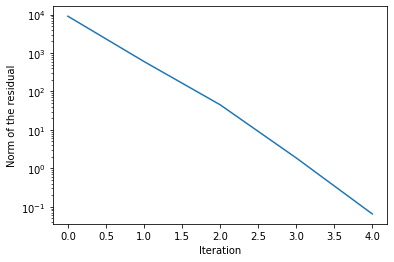

x = 
 [[ 0.04053531]
 [-0.00384131]
 [ 0.03927319]
 [ 0.15023229]
 [ 0.00041442]] 



In [6]:
# Input matrix
n = 5
A = np.random.randint(0, 20, (n, n))

# Makes A non singular and diagonally dominant
for i in range(A.shape[0]):
    A[i][i] = (A[i][i] + 1) * 20
    
b = np.random.randint(0, 20, (n, 1))
x_0 = np.random.randint(0, 20, (n, 1))*1.

print(f'A = \n{A}\n')

# Solution
x = Gauss_Seidel_method(A, b, x_0, tol=0.0001)
print('x = \n', x, '\n')

## Diagonally dominant matrix

<span style="color:orange">Definition</span> A matrix $A\in \mathbb{R}^{n\times n}$ is said to be strictly diagonally dominant if $$a_{ii} > \sum_{j\neq i}|a_{ij}|$$

<span style="color:red">Theorem</span> If $A$ is diagonally dominant then both the Jacobi method and the Gauss-Sidel method converge and $||B_{GS}||_\infty< ||B_J||_\infty<1$

In [7]:
# Checks if A is diagonally dominant
def is_diagonally_dominant(A):
    for i in range(A.shape[0]):
        if np.sum(A[i][:]) - A[i][i] > A[i][i]:
            return False
    
    return True

<h1 style="background-color:rgb(181 ,50 ,84);color:white;text-align:center">Convergence test</h1>

In [8]:
def test_convergence(A):
    print(f'A_h is diagonally dominant: {is_diagonally_dominant(A)}')
    print(f'Spectral radius of Thomas iteration matrix: {spectral_radius(Jacobi_iteration_matrix(A)):.3f}')
    print(f'Spectral radius of Gauss-Seidel iteration matrix: {spectral_radius(Gauss_Seidel_iteration_matrix(A)):.3f}')

    n = A.shape[0]
    b = np.random.randint(1, 20, (n, 1))
    x0 = np.random.randint(1, 20, (n, 1))*1.
    return Jacobi_method(A, b, x0), Gauss_Seidel_method(A, b, x0, tol=0.0001)

A_h is diagonally dominant: True
Spectral radius of Thomas iteration matrix: 0.500
Spectral radius of Gauss-Seidel iteration matrix: 0.078


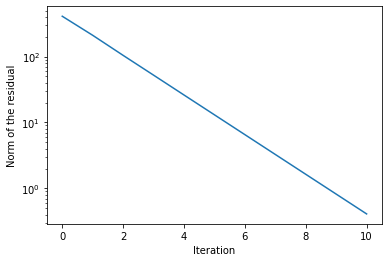

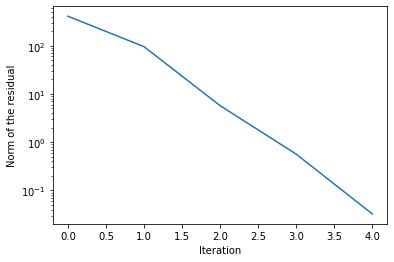

A_h is diagonally dominant: True
Spectral radius of Thomas iteration matrix: 0.250
Spectral radius of Gauss-Seidel iteration matrix: 0.036


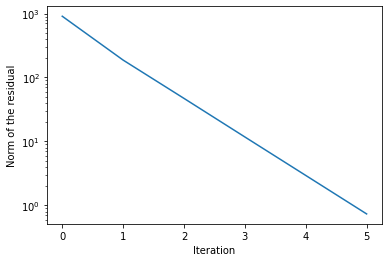

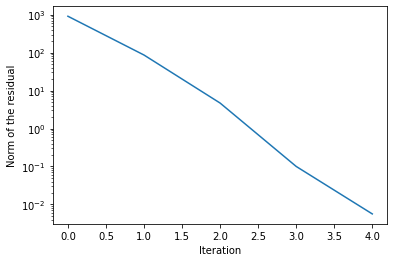

A_h is diagonally dominant: True
Spectral radius of Thomas iteration matrix: 0.167
Spectral radius of Gauss-Seidel iteration matrix: 0.022


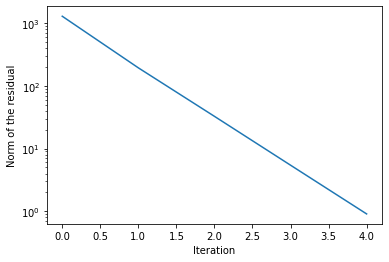

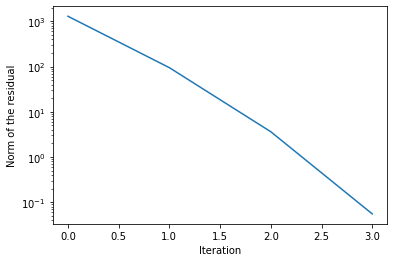

A_h is diagonally dominant: True
Spectral radius of Thomas iteration matrix: 0.125
Spectral radius of Gauss-Seidel iteration matrix: 0.016


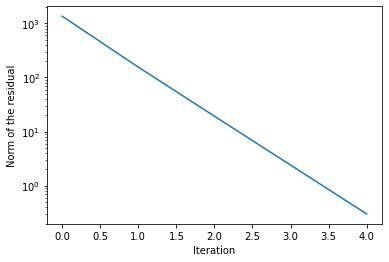

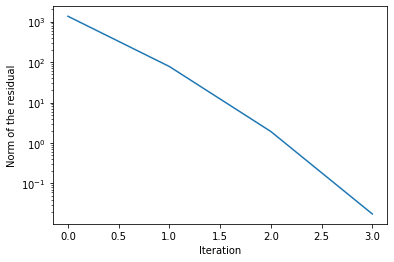

A_h is diagonally dominant: True
Spectral radius of Thomas iteration matrix: 0.100
Spectral radius of Gauss-Seidel iteration matrix: 0.012


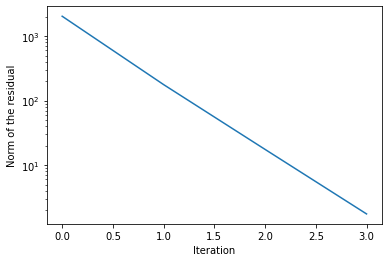

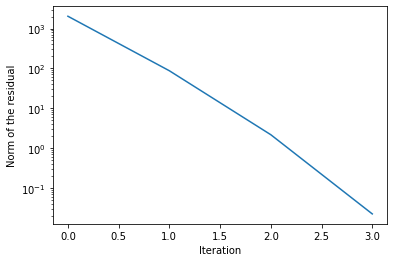

In [15]:
### 1 ###

# Build a matrix A_h such that h = {2, 4, 6, 8, 10} 
A = np.random.randint(1, 1000, (10, 10))*1. / 1000
A = A - np.diag(np.diag(A));
s = np.sum(np.abs(A), axis=1);

for h in [2, 4, 6, 8, 10]:
    A_h = A + h*np.diag(s)
    
    test_convergence(A_h)

A_h is diagonally dominant: False
Spectral radius of Thomas iteration matrix: 1.125
Spectral radius of Gauss-Seidel iteration matrix: 1.583


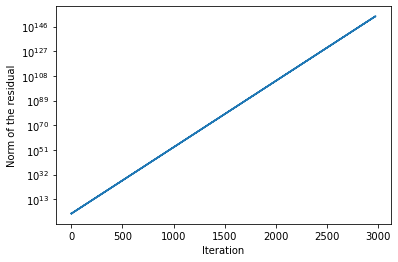

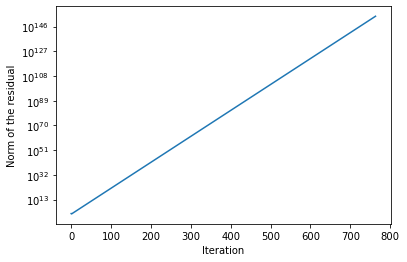

(array([[nan],
        [inf],
        [nan]]),
 array([[-3.7478718e+307],
        [            inf],
        [           -inf]]))

In [16]:
### 2 ###
A = np.array([[3, 0, 4], [7, 4, 2], [-1, 1, 2]])

test_convergence(A)

A_h is diagonally dominant: False
Spectral radius of Thomas iteration matrix: 0.813
Spectral radius of Gauss-Seidel iteration matrix: 1.111


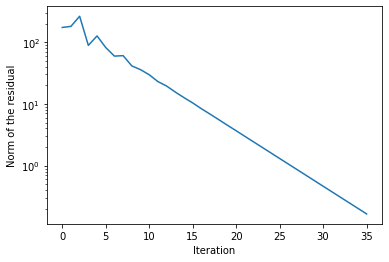

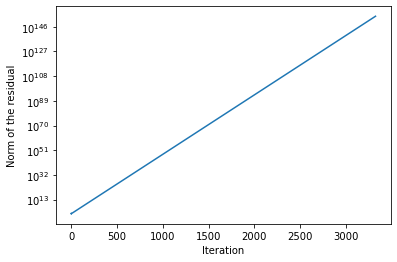

(array([[ 0.0560433 ],
        [-1.5668603 ],
        [-2.63108767]]),
 array([[-3.78019072e+307],
        [ 0.00000000e+000],
        [            -inf]]))

In [17]:
### 3 ###
A = np.array([[-3, 3, -6], [-4, 7, -8], [5, 7, -9]])

test_convergence(A)

A_h is diagonally dominant: False
Spectral radius of Thomas iteration matrix: 0.444
Spectral radius of Gauss-Seidel iteration matrix: 0.019


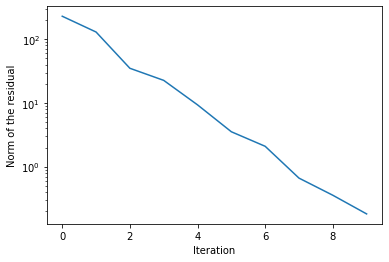

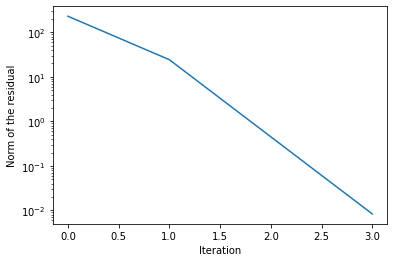

(array([[ 2.70458724],
        [-1.17488601],
        [ 1.42748819]]),
 array([[ 2.69127229],
        [-1.17971727],
        [ 1.40628969]]))

In [18]:
### 4 ###
A = np.array([[4, 1, 1], [2, -9, 0], [0, -8, -6]])

test_convergence(A)

A_h is diagonally dominant: False
Spectral radius of Thomas iteration matrix: 0.641
Spectral radius of Gauss-Seidel iteration matrix: 0.775


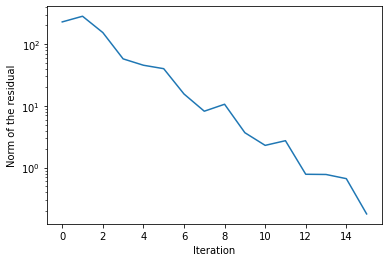

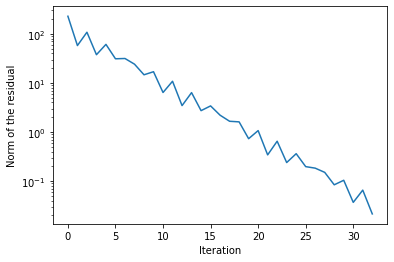

(array([[-3.77435696],
        [ 6.08344079],
        [-0.66533601]]),
 array([[-3.81582074],
        [ 6.12208744],
        [-0.66806036]]))

In [19]:
### 5 ###
A = np.array([[7, 6, 9], [4, 5, -4], [-7, -3, 8]])

test_convergence(A)